In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay

In [2]:
dataset = pd.read_csv('/Users/marjorylamothe/Downloads/Projet Get Around/get_around_pricing_project.csv')

In [3]:
print("Number of rows : {}".format(dataset.shape[0]))
print()

print("Display of dataset: ")
display(dataset.head())
print()

print("Basics statistics: ")
data_apr14_desc = dataset.describe(include='all')
display(data_apr14_desc)
print()

print("Percentage of missing values: ")
display(100*dataset.isnull().sum()/dataset.shape[0])

Number of rows : 4843

Display of dataset: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [4]:
dataset=dataset.drop(columns='Unnamed: 0')

In [5]:
value_counts_model = dataset['model_key'].value_counts()
to_rename_model = value_counts_model[value_counts_model <= 3].index
dataset['model_key']=dataset['model_key'].apply(lambda x: 'Other' if x in to_rename_model else x)

In [7]:
value_counts_fuel = dataset['fuel'].value_counts()
to_rename_fuel = value_counts_fuel[value_counts_fuel <= 8].index
dataset['fuel']=dataset['fuel'].apply(lambda x: 'other' if x in to_rename_fuel else x)


In [9]:
value_counts_paint = dataset['paint_color'].value_counts()
to_rename_paint = value_counts_paint[value_counts_paint <= 6].index
dataset['paint_color']=dataset['paint_color'].apply(lambda x: 'other' if x in to_rename_paint else x)

In [11]:
value_counts_type = dataset['car_type'].value_counts()
to_rename_type = value_counts_type[value_counts_type <= 1].index
dataset['car_type']=dataset['car_type'].apply(lambda x: 'Other' if x in to_rename_type else x)

In [13]:
dataset["price_category"] = dataset["rental_price_per_day"].apply(lambda x: "0-50" if x >= 0 and x <= 50 
                                        else "51-100" if x >= 51 and x <= 100 
                                        else "101-150" if x >= 101 and x <= 150 
                                        else "151-200" if x >= 151 and x <= 200 
                                        else "201-250" if x >= 201 and x <= 250 
                                        else "251-300" if x >= 251 and x <= 300 
                                        else "301-450" if x >= 301 and x <= 450 
                                        else x)

In [15]:
dataset["mileage_cat"] = dataset["mileage"].apply(lambda x: "0-50000" if x >= 0 and x <= 50000 
                                        else "50001-100000" if x >= 50001 and x <= 100000 
                                        else "100001-150000" if x >= 100001 and x <= 150000 
                                        else "150001-200000" if x >= 150001 and x <= 200000 
                                        else "200001-250000" if x >= 200001 and x <= 250000 
                                        else "250001-300000" if x >= 250001 and x <= 300000
                                        else "300001-350000" if x >= 300001 and x <= 350000
                                        else "350001-400000" if x >= 350001 and x <= 400000
                                        else "other")

In [17]:
dataset["power_cat"] = dataset["engine_power"].apply(lambda x: "0-50" if x >= 0 and x <= 50 
                                        else "51-100" if x >= 51 and x <= 100 
                                        else "101-150" if x >= 101 and x <= 150 
                                        else "151-200" if x >= 151 and x <= 200 
                                        else "201-250" if x >= 201 and x <= 250
                                        else "251-300" if x >= 251 and x <= 300 
                                        else '301-350' if x >= 301 and x <= 350 
                                        else '351-400' if x >= 351 and x <= 400 
                                        else '401-450' if x >= 401 and x <= 450 
                                        else x)

In [19]:
dataset=dataset.drop(columns=["rental_price_per_day","mileage","engine_power"])

In [21]:
print("Separating labels from features...")
target_variable = "price_category"

X = dataset.drop(target_variable, axis = 1)
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    101-150
1    251-300
2    101-150
3    151-200
4    151-200
Name: price_category, dtype: object

X :
  model_key    fuel paint_color     car_type  private_parking_available  \
0   Citroën  diesel       black  convertible                       True   
1   Citroën  petrol        grey  convertible                       True   
2   Citroën  diesel       white  convertible                      False   
3   Citroën  diesel         red  convertible                       True   
4   Citroën  diesel      silver  convertible                       True   

   has_gps  has_air_conditioning  automatic_car  has_getaround_connect  \
0     True                 False          False                   True   
1     True                 False          False                  False   
2    False                 False          False                   True   
3     True                 False          False                   True   
4     True             

In [22]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  []
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires', 'mileage_cat', 'power_cat']


In [23]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [24]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first') # no missing values in categorical data, so we only need the OHE

In [25]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

In [26]:
dataset=dataset.astype(str)
print(dataset.dtypes)

model_key                    object
fuel                         object
paint_color                  object
car_type                     object
private_parking_available    object
has_gps                      object
has_air_conditioning         object
automatic_car                object
has_getaround_connect        object
has_speed_regulator          object
winter_tires                 object
price_category               object
mileage_cat                  object
power_cat                    object
dtype: object


In [27]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train.astype(str))
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_train.head())
encoder = LabelEncoder()
Y_train = encoder.fit_transform(Y_train.astype(str))
print("...Done")
print(Y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test.astype(str)) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(Y_test[0:5])
Y_test = encoder.transform(Y_test.astype(str))
print("...Done")
print(Y_test[0:5])

Performing preprocessings on train set...
     model_key    fuel paint_color car_type  private_parking_available  \
4550       BMW  diesel       white      suv                       True   
1237   Citroën  diesel       black   estate                      False   
3158   Renault  diesel        grey    sedan                       True   
900    Peugeot  diesel       black   estate                       True   
933    Citroën  diesel       black   estate                       True   

      has_gps  has_air_conditioning  automatic_car  has_getaround_connect  \
4550     True                 False          False                  False   
1237     True                 False          False                   True   
3158     True                 False          False                   True   
900      True                 False          False                  False   
933      True                 False          False                  False   

      has_speed_regulator  winter_tires    mileage

In [28]:
print('Training linear SVM...')
svc = SVC(kernel = 'linear', probability = True) # set probability to True if you plan to use predict_proba()
svc.fit(X_train, Y_train)
print("...Done.")

Training linear SVM...
...Done.


In [29]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = svc.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = svc.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[1 1 1 ... 1 1 1]

Probabilities on training set...
...Done.
[[1.74513116e-03 9.05313461e-01 4.43638879e-02 ... 1.57634791e-04
  5.79554338e-04 4.72237713e-02]
 [4.49384700e-03 9.17271069e-01 4.25647163e-03 ... 1.42107001e-04
  3.04681965e-04 7.34392556e-02]
 [3.93445392e-03 8.68530244e-01 3.04533384e-03 ... 3.03264032e-04
  1.31113582e-03 1.22567516e-01]
 ...
 [3.99451327e-03 9.11714757e-01 2.43406796e-02 ... 1.10087885e-04
  1.33999918e-03 5.82223191e-02]
 [1.04335483e-02 7.41628330e-01 3.02571053e-03 ... 9.56757618e-04
  1.10368404e-03 2.42318457e-01]
 [1.10921610e-02 8.52640344e-01 5.68294380e-02 ... 2.14825174e-03
  2.14355015e-03 7.21490800e-02]]



In [30]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = svc.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = svc.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[1 1 1 6 1 2 1 3 2 1 1 1 1 1 2 1 6 2 1 1 3 1 1 1 1 1 1 1 1 1 0 6 1 1 1 1 6
 6 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 2 2 2 1 1 1 1 1 1 2 1 1 1 6 1 1 1 2 6 1 2
 6 6 1 1 1 1 1 1 1 2 1 6 1 1 1 1 6 2 2 1 1 1 6 1 1 1 1 6 1 2 1 6 1 1 1 2 6
 6 1 1 1 1 1 1 1 6 1 1 1 1 2 1 6 1 1 1 6 6 2 1 2 6 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 6 1 1 1 1 1 1 1 1 1 6 6 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 6 1
 1 6 1 1 6 1 1 6 1 6 6 6 1 1 1 1 6 1 1 1 1 1 1 1 1 3 1 1 1 1 6 1 6 1 1 2 1
 1 1 2 1 1 1 6 1 6 6 1 1 1 1 6 1 1 1 1 1 1 2 1 1 2 1 1 6 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 6 1 1 1 1 1 1 6 1 1 1 1 1 1 6 1 1 1 6 1 1 1 1 1 1 3 1 6 1 6 1 2
 1 2 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 6 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 6 1 1 1 1 1 1 6 1 1 2 6 1 6 1 1 1 1 2 1 1 1 1 1 1 6 1 1 1 1 2 1 1 2 1 2
 1 1 1 1 1 1 1 1 2 1 1 1 6 2 1 1 1 6 1 1 1 1 2 1 1 1 1 6 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 6 1 3 1 2 1 1 1 2 1 1 1 1 1 1 1 1 6
 1 1 6 1 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 2 6 1 1 1 3

In [32]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred, average='weighted'))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred, average='weighted'))
print()

accuracy on training set :  0.7950438822922045
accuracy on test set :  0.7585139318885449

f1-score on training set :  0.7784995705711911
f1-score on test set :  0.7415961406382936



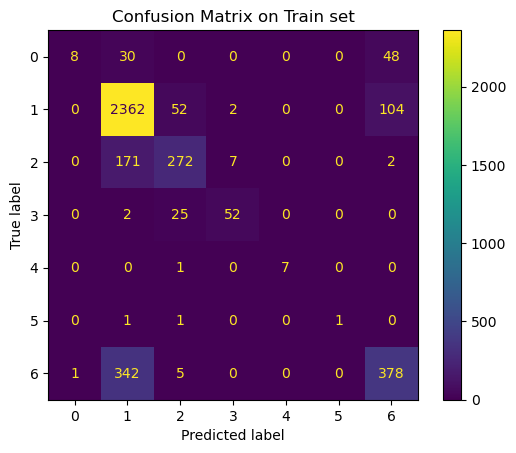

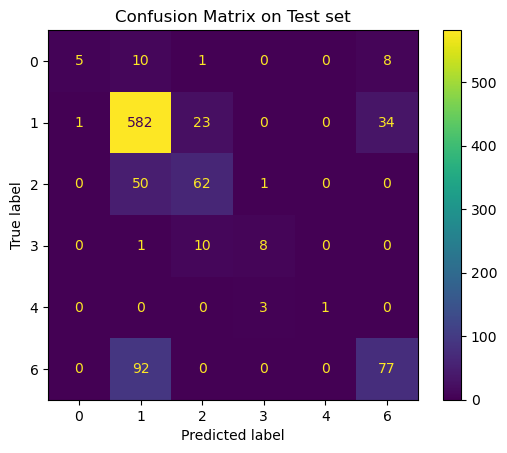

In [33]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svc, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()


In [35]:
# Perform grid search
print("Grid search...")
classifier = SVC(kernel = 'rbf', probability = True)

# Grid of values to be tested
params = {
    'C': [0.1, 1.0, 10.0],
    'gamma': [0.1, 1.0, 10.0]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)


Grid search...
...Done.
Best hyperparameters :  {'C': 10.0, 'gamma': 0.1}
Best validation accuracy :  0.7720679164078693


In [36]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
Y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(Y_train_proba)
print()

Predictions on training set...
...Done.
[1 1 1 ... 1 1 1]

Probabilities on training set...
...Done.
[[7.98310313e-03 8.30189508e-01 8.50056964e-02 ... 4.83056812e-04
  7.72752583e-04 7.45545279e-02]
 [2.14346891e-03 8.53843092e-01 2.95607038e-03 ... 9.82714281e-05
  3.83452493e-04 1.40511105e-01]
 [1.21282328e-03 8.47473172e-01 2.42770188e-02 ... 3.26719118e-04
  7.95466419e-04 1.25413871e-01]
 ...
 [2.43369902e-03 8.09433374e-01 7.14456880e-03 ... 9.98941954e-05
  6.85626030e-04 1.79569800e-01]
 [3.55358948e-03 6.96907305e-01 2.91516245e-02 ... 1.70463919e-03
  1.00446726e-03 2.66060635e-01]
 [3.37547287e-03 8.88188105e-01 8.78920070e-03 ... 7.38942111e-04
  5.79471935e-04 9.73832191e-02]]



In [37]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
Y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(Y_test_proba)
print()

Predictions on test set...
...Done.
[1 2 1 6 1 2 1 3 2 1 1 1 1 1 2 1 6 2 1 1 2 1 1 1 1 1 1 1 1 1 0 6 1 1 1 1 6
 6 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 2 6 1 1 1 2 6 1 2
 6 0 1 1 1 1 1 1 1 2 1 6 1 1 1 1 1 2 2 1 1 1 6 1 1 1 1 6 1 2 1 6 1 1 1 2 6
 0 1 1 1 1 1 1 1 6 1 1 1 1 2 1 6 1 1 1 6 6 2 1 2 1 2 1 1 1 1 0 1 1 1 1 1 1
 1 1 6 1 1 1 1 1 1 2 1 1 6 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 6 1
 2 1 1 1 1 1 6 1 1 6 6 6 1 1 1 1 6 1 1 1 1 1 1 1 1 3 1 1 1 1 6 1 6 1 1 2 1
 1 1 2 1 1 1 1 1 0 6 1 1 1 1 6 1 1 1 1 1 1 2 1 1 2 1 1 1 6 1 0 1 1 1 1 1 1
 1 1 6 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 6 2 1 1 1 1 1 6 1 1 1 3 1 6 1 0 1 2
 1 2 1 1 2 6 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 6 1 1 1 1 1 1 6 1 1
 1 0 1 1 1 1 1 1 1 1 1 2 6 1 6 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 6 1 1 1 1 1 1 1 1 1 6 1 3 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 6 1 2 1 2 1 1 1 2 2 1 1 1 1 1 1 1 6
 1 1 6 1 2 2 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 6 1 1 2 6 1 1 1 3

In [38]:
# Print scores
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_pred))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_pred))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_pred, average='weighted'))
print("f1-score on test set : ", f1_score(Y_test, Y_test_pred, average='weighted'))
print()

accuracy on training set :  0.8846153846153846
accuracy on test set :  0.7884416924664602

f1-score on training set :  0.8804212237163167
f1-score on test set :  0.7756454840410404



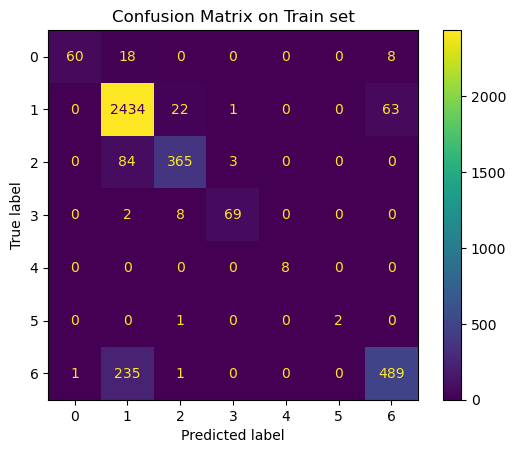

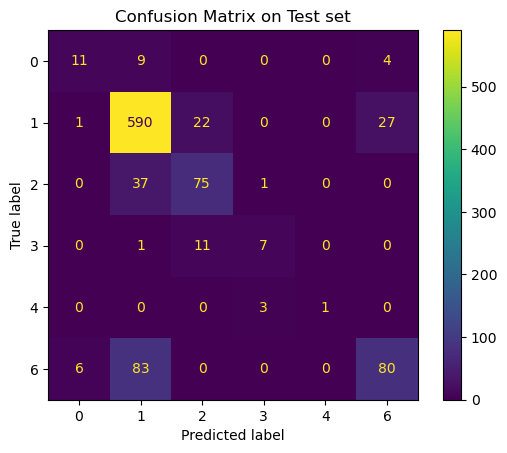

In [39]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, Y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, Y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()